<h1><center>Laboratorio 7: La desperación de Mr. Lepin 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Benjamin Hernth   
- Nombre de alumno 2:


### **Link de repositorio de GitHub:** `https://github.com/morbul/MDS7202_entregas`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

# Temas a tratar

- Aplicar Pandas para obtener características de un DataFrame.
- Aplicar Pipelines.
- Aplicar Clusters sobre un conjunto de datos.

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio

- Comprender y aprovechar las ventajas que nos ofrece la librería `pandas` con respecto a trabajar en Python 'puro'.
- Crear nuevas características para entrenar un modelo de clustering.
- Comprender como aplicar pipelines de Scikit-Learn para generar procesos más limpios.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [86]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from IPython.display import HTML

# Libreria para plotear (En colab esta desactualizado plotly)
!pip install --upgrade plotly
import plotly.express as px
import plotly.graph_objects as go

# Librerias utiles
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [87]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin, en una nueva reunión, le cuenta a ud y su equipo que los resultados derivados del análisis exploratorio de dato presentaron una gran utilidad para la empresa y que tiene un gran entusiasmo por continuar trabajando con ustedes.
Es por esto, que Mr. Lepin les pide que cargue y visualicen algunas de las filas que componen el Dataset.
A continuación un extracto de lo parlamentado en la reunión:

    - Usted: Es un gran logro para nuestro equipo que usted haya encontrado excelente el EDA. ¿Qué tiene en mente ahora?
    - Mr. Lepin: Resulta que hace algún tiempo, mientras tomaba un mojito en una reunión de gerentes en Panamá, oí a un *chato* acerca de **LRMFP**, que es un modelo que permite personificar a los clientes a través de la fabricación de distintos atributos que describen a los clientes. Lo encontré es-tu-pendo ñatito. 
    - Usted: Ehh bueno. Investigaremos acerca de este modelo y veremos lo que podemos hacer.

Por ende, su siguiente tarea es calcular **LRMFP** sobre cada cliente y luego hacer un análisis de las características generadas. Para esto, el área de ventas les entrega un nuevo archivo llamado `online_retail_II_cleaned.pickle`, quien posee los datos del DataFrame original limpios y listos para obtener las características solicitadas por Mr. Lepin.

In [88]:
df_retail = pd.read_pickle("online_retail_II_cleaned.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": "category",
        "Description": str,
        "Customer ID": "category",
        "Country": "category"
    }
)
df_retail


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
400942,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
400943,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
400944,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
400945,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [89]:
df_retail['InterVisitTime'] = df_retail.groupby('Customer ID')['InvoiceDate'].diff()

## 1.2 Creación de nuevas Caracteristicas [2 Puntos] 

Como ya se les comento, Mr. Lepin esta interesado en obtener las características **LRMFP**, para esto les señala que estas características se construyen en base a las siguientes definiciones:

- **Length (L)**: Intervalo de tiempo, en días, entre la primera y la última visita del cliente. Mientras mas grande sea el valor, mas fiel es el cliente.

- **Recency (R)**: Indica hace cuanto tiempo el cliente realizo su ultima compra. Notar que para este caso, mientras mas grande es el valor, menos interes posee el usuario para repetir una compra en uno de los locales.

- **Monetary (M)**: El término "monetario" se refiere a la cantidad media de dinero gastada por cada visita del cliente durante el período de observación y refleja la contribución del cliente a los ingresos de la empresa.

- **Frequency (F)**: Se refiere al número total de visitas del cliente durante el periodo de observación. Cuanto mayor sea la frecuencia, mayor será la fidelidad del cliente. 

- **Periodicity (P)**: Representa si los clientes visitan las tiendas con regularidad.

$$Periodicity(n)=std(IVT_1, ..., IVT_n)$$

&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Donde $IVT$ denota el tiempo entre visitas y n representa el número de valores de tiempo entre visitas de un cliente.
 

$$IVT_i=date\_diff(t_{i+1},t)$$

En base a las definiciones señaladas, diseñe una función que permita obtener las características **LRMFP** recibiendo un DataFrame como entrada. Para esto, no estará permitido el uso de iteradores, utilice todas las herramientas que les ofrece `pandas` para realizar esto.

Una referencia que le puede ser útil es el [documento original](https://www.researchgate.net/publication/315979555_LRFMP_model_for_customer_segmentation_in_the_grocery_retail_industry_a_case_study) en donde se propone este método.

**Ejemplo de Resultado Esperado:**

| Customer ID | Length | Recency | Frequency | Monetary | Periodicity |
|------------:|-------:|--------:|----------:|---------:|------------:|
|   12346.0   |    294 |      67 |        46 |   -64.68 |        37.0 |
|   12347.0   |     37 |       3 |        71 |  1323.32 |         0.0 |
|   12349.0   |    327 |      43 |       107 |  2646.99 |        78.0 |
|   12352.0   |     16 |      11 |        18 |   343.80 |         0.0 |
|   12356.0   |     44 |      16 |        84 |  3562.25 |        12.0 |

**Respuesta:**

In [90]:
numcol = ['Length', 'Recency', 'Frecuency', 'Monetary', 'Periodiocity']

In [91]:
def custom_features(df):
    df['InterVisitTime'] = df.groupby('Customer ID')['InvoiceDate'].diff().dt.days
    df_metricas = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (x.max() - x.min()).days}).rename(columns={'InvoiceDate': 'Length'})
    df_metricas['Recency'] = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (pd.Timestamp('today') - x.max() ).days})
    df_metricas['Frecuency'] = df.groupby('Customer ID')['InvoiceDate'].nunique()
    df_metricas['Monetary'] = df.groupby('Customer ID').agg({'Price': lambda x: x.sum()})
    df_metricas['Monetary'] = df_metricas['Monetary']/df_metricas['Frecuency']
    df_metricas['Periodiocity'] = df.groupby('Customer ID')['InterVisitTime'].std()
    df_metricas['Periodiocity'] = df_metricas['Periodiocity']
    df.drop(columns=['InterVisitTime'], inplace=True)
    df_metricas = df_metricas[numcol].fillna(0)
    return df_metricas

In [92]:
df_id = custom_features(df_retail)  
df_id

,Length,Recency,Frecuency,Monetary,Periodiocity
Customer ID,,,,,
12346.0,196,4726,11,18.7600,21.724076
12347.0,37,4564,2,81.4750,4.422346
12348.0,0,4635,1,14.3900,0.000000
12349.0,181,4604,3,291.7800,16.200990
12351.0,0,4572,1,49.4600,0.000000
...,...,...,...,...,...
18283.0,275,4579,6,79.5450,11.783701
18284.0,0,4628,1,91.0900,0.000000
18285.0,0,4857,1,100.2000,0.000000


**Resúesta de Pauta:**

## 1.3 Pipelines 👷

Finalmente *Don Mora* le pregunta si seria posible realizar un pipeline para realizar una segmentación de los clientes con los nuevos datos generados, a lo que usted responde que **sí** y propone la utilización de k-means para la segmentación.

A continuación siga los pasos requeridos para obtener la segmentación de clientes.

### 1.3.1 Estandarizar Caracteristicas [0.5 puntos]

Construya una clase llamada ``MinMax()`` utilizando ``BaseEstimator`` y ``TransformerMixin`` para realizar una transformación de cada una de las columnas de un DataFrame utilizando ``ColumnTransformer()`` más tarde (tome como referencia el siguiente [enlace](https://sklearn-template.readthedocs.io/en/latest/user_guide.html#transformer)).


 Para esto considere que Min-Max escaler queda dada por la ecuación:

$$MinMax = \dfrac{x-min(x)}{max(x) - min(x)}$$

Con esto buscamos que los valores que componen a las columnas se muevan en el rango de valores $[0, 1]$.

**Respuesta:**

In [93]:
class MinMax(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.min_values = None
        self.max_values = None

    def fit(self, X, y=None):
        self.min_values = X.min()
        self.max_values = X.max()
        return self
    
    def transform(self, X):
         return (X - self.min_values) / (self.max_values - self.min_values)


### 1.3.2 `T-SNE` Pipeline [1.0 puntos]

Para comenzar introduciéndose en el uso de pipeline, decide probar realizando un pipeline enfocado en la reducción de dimensionalidad y así hacer no decepcionar a Mr. Lepin con la clusterización del modelo. 

Configure un pipeline utilizando el algoritmo `T-SNE` sobre los datos **LRMFP**, donde, para la realización del pipeline considera los siguientes pasos:

1. Como primer paso obtenga las características **LRMFP** desde el DataFrame ``df_retail_II_cleaned.pickle`` utilizando la función ``custom_features`` creada anteriormente, junto a ``FunctionTransformer()``. Considere esto como el primer paso de su pipeline.
2. En segundo lugar usando ``ColumnTransformer()`` aplique el MinxMax scaler creado por usted sobre todas las columnas generadas en el paso anterior. 
3. Finalmente, aplique un último paso donde obtiene las 2 componentes más relevantes utilizando el algoritmo `T-SNE` de sckit-learn.

Tras aplicar las transformaciones sobre el dataset **LRMFP**, gráfique las componentes obtenidas en la reducción de dimensionalidad.

**Respuesta:**

In [94]:
from sklearn.manifold import TSNE

# Creamos una instancia de tsne
step3  = ('tse',TSNE(n_components=2, random_state=42))
minmaxscaler = MinMax()



# Crear el primer paso del pipeline utilizando FunctionTransformer y custom_features
step1 = ('custom_features', FunctionTransformer(custom_features))

# Paso 2: Aplicar MinMaxScaler a todas las columnas generadas en el paso anterior
column_transformer = ColumnTransformer(
    transformers=[
        ('minmaxscaler', minmaxscaler, numcol)
    ],
    remainder='passthrough'  # Mantener las columnas no transformadas en el resultado final
)

# Crear el segundo paso del pipeline utilizando ColumnTransformer
step2 = ('column_transformer', column_transformer)
 

# Crear el pipeline combinando ambos pasos
pipeline = Pipeline([step1, step2, step3])

# Aplicar el pipeline a los datos
data_t = pipeline.fit_transform(df_retail)


c:\Users\benja\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\benja\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [95]:
data_t = pd.DataFrame(data_t, columns=['x', 'y'])
data_t.head(5)


,x,y
0,-3.169420,1.005885
1,43.603027,-23.016691
2,25.306561,-71.033760
3,35.813641,17.138588
4,-58.484631,20.350872


In [96]:
df_id.reset_index(inplace=True)
df_id


,Customer ID,Length,Recency,Frecuency,Monetary,Periodiocity
0,12346.0,196,4726,11,18.7600,21.724076
1,12347.0,37,4564,2,81.4750,4.422346
2,12348.0,0,4635,1,14.3900,0.000000
3,12349.0,181,4604,3,291.7800,16.200990
4,12351.0,0,4572,1,49.4600,0.000000
...,...,...,...,...,...,...
4309,18283.0,275,4579,6,79.5450,11.783701
4310,18284.0,0,4628,1,91.0900,0.000000
4311,18285.0,0,4857,1,100.2000,0.000000
4312,18286.0,247,4673,2,143.1500,30.403598


In [97]:
df_id['x'] = data_t.iloc[:,0]
df_id['y'] = data_t.iloc[:,1]
df_id

,Customer ID,Length,Recency,Frecuency,Monetary,Periodiocity,x,y
0,12346.0,196,4726,11,18.7600,21.724076,-3.169420,1.005885
1,12347.0,37,4564,2,81.4750,4.422346,43.603027,-23.016691
2,12348.0,0,4635,1,14.3900,0.000000,25.306561,-71.033760
3,12349.0,181,4604,3,291.7800,16.200990,35.813641,17.138588
4,12351.0,0,4572,1,49.4600,0.000000,-58.484631,20.350872
...,...,...,...,...,...,...,...,...
4309,18283.0,275,4579,6,79.5450,11.783701,18.394835,43.933434
4310,18284.0,0,4628,1,91.0900,0.000000,33.309338,-64.453514
4311,18285.0,0,4857,1,100.2000,0.000000,-22.655828,-66.861115
4312,18286.0,247,4673,2,143.1500,30.403598,0.545220,14.591041


In [98]:
px.scatter(df_id, x="x", y="y", hover_data=numcol)

### 1.3.3 Clustering

#### 1.3.3.1 Método del Codo [1 puntos]

Utilizando la clase creada para escalamiento, aplique el método del codo para visualizar cual es el número de clusters que mejor se ajustan a los datos. Realice esto utilizando el algoritmo K-means dentro de un pipeline para un $k \in [1,20]$, donde k representa el número de clusters del k-means. Para la realización de esta sección y la próxima (1.3.3.2), considere los mismos pasos utilizados para el t-sne, pero **permutando el algoritmo de reducción de dimensionalidad por k-means.**

A través del grafico obtenido, comente y justifique que valor de k escogería para realizar el k-means.

**Respuesta:**

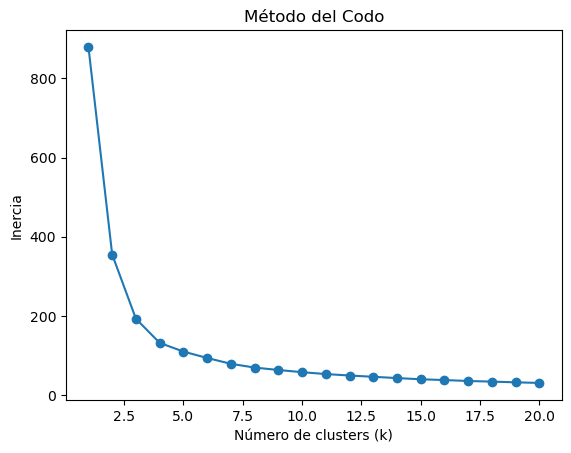

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer


pipeline = Pipeline([step1, step2])


inertias = []
for k in range(1, 21):
    # Agregar el paso 3 al pipeline para el K-means
    step3 = ('kmeans', KMeans(n_clusters=k, random_state=42))
    pipeline.steps.append(step3)
    
    # Aplicar el pipeline a los datos
    data_t = pipeline.fit_transform(df_retail)
    
    # Calcular la inercia del modelo K-means y almacenarla
    inertia = pipeline.named_steps['kmeans'].inertia_
    inertias.append(inertia)
    
    # Remover el paso 3 del pipeline para la siguiente iteración
    pipeline.steps.pop()

# Graficar el método del codo
plt.plot(range(1, 21), inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


Se puede apreciar que al pasar de 4 cluster la inercia ya comienza a reducirse de manera constante y en baja proporción a la cantidad de cluster. Por lo que se eligen 4 cluster.

#### 1.3.3.2 Segmentación de Clientes con K-Means 🎁 [1 punto]

En base a la elección de k realizada en la sección anterior, utilice este valor escogido y entrene un modelo de K-means utilizando el mismo pipeline de scikit-learn utilizado anteriormente.

Una vez ajustado los datos, genere una tabla con los promedios (o medianas) para cada uno de los atributos, agrupando estos por el clúster que pertenecen. ¿Es posible observar agrupaciones coherentes?, ¿Qué tipo de clientes posee el retail?, Justifique su respuesta y no decepcione a Mr. Lepin.


**Respuesta:**

In [100]:
step3 = ('kmeans', KMeans(n_clusters=4, random_state=42))

pipeline = Pipeline([step1, step2, step3])

data_t = pipeline.fit_transform(df_retail)

data_t = pd.DataFrame(data_t)


In [101]:
# Obtener las etiquetas de cluster
labels = pipeline.named_steps['kmeans'].labels_


In [102]:
# Convertir las etiquetas en un DataFrame
labels_df = pd.DataFrame(labels, columns=['Cluster'])

# Concatenar data y labels_df
datakm = pd.concat([df_id, labels_df], axis=1)
datakm['Cluster'].value_counts()

0    1277
3    1116
1    1008
2     913
Name: Cluster, dtype: int64

In [103]:
# Calcular los promedios o medianas por clúster
cluster_stats = datakm.groupby('Cluster').mean()  # También puedes utilizar median() en lugar de mean() si lo prefieres
columns_to_exclude = ['x', 'y']
columns_to_include = [col for col in datakm.columns if col not in columns_to_exclude]
cluster_stats = datakm[columns_to_include].groupby('Cluster').mean()
# Mostrar la tabla con los promedios o medianas por clúster
print(cluster_stats)

             Length      Recency  Frecuency   Monetary  Periodiocity
Cluster                                                             
0         17.262334  4612.810493   1.725137  75.009346      2.394149
1        181.929563  4628.414683   4.198413  67.206152     20.846738
2         17.749179  4816.122673   1.507119  84.015972      2.847132
3        319.146953  4584.653226  10.186380  69.386329     20.131680


#COMENTARIOS

Si es posible observar datos coherentes, por ejemplo:<br>
-Cluster 0 : son clientes nuevos(bajo L), que han ido pocas veces siendo uno de los que más gastan.<br>
-Cluster 2: son clientes nuevos igualmente pero que han ido aun menos que los de 0 pero son los que más han gastado.<br>
-Cluster 1: clientes regulares con algo más de relacion con el local con un gasto bajo en relacion a los otros cluster.<br>
-cluster 3: los clientes más antiguos del local, quienes más van y gastan moderadamente. 

#### 1.3.3.3 Plot de K-Means 📈 [0.5 puntos]



Por último, Mr. Lepin, impaciente de no entender lo que usted intenta explicarle, le solicita que por favor muestre algún resultado "visual" de los grupos encontrados.

Para esto, grafique nuevamente las características encontradas usando `T-SNE` (no calcule de nuevo, simplemente utilice las proyecciones encontradas) y agregue las labels calculadas con kmeans como el argumento `color`.   

Comente: ¿Se separan bien los distintos clusters en la visualización?


**Respuesta:**

Lo cluster si se separan bien, se ven concentraciones de datos distinguibles. Podemos ver como el cluster 2 esta "dentro" del 0 y esto se debe a que los clientes de estos cluster se parecen mucho. Solo que estos ultimos gastan un poco menos y van más a menudo pero porcentajes muy bajos

In [104]:
fig = px.scatter(datakm, x="x", y="y", color="Cluster", hover_data=numcol, labels={"Cluster": "Etiqueta"})
fig.show()

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por correo, Discord o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>